<a href="https://colab.research.google.com/github/manmorjim/ai_playground/blob/main/interview/1st_problem/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing the environment

Install main dependencies for the code

In [ ]:
#from https://github.com/ines/spacymoji
!pip install pandas yellowbrick datasets
!pip install -U spacy[transformers]
!pip install emoji

     |████████████████████████████████| 194kB 14.1MB/s 
     |████████████████████████████████| 112kB 52.1MB/s 
     |████████████████████████████████| 245kB 35.4MB/s 
     |████████████████████████████████| 12.8MB 236kB/s 
     |████████████████████████████████| 460kB 49.0MB/s 
     |████████████████████████████████| 9.1MB 48.4MB/s 
     |████████████████████████████████| 1.1MB 40.9MB/s 
     |████████████████████████████████| 122kB 62.2MB/s 
     |████████████████████████████████| 1.8MB 49.4MB/s 
     |████████████████████████████████| 983kB 43.8MB/s 
     |████████████████████████████████| 71kB 11.5MB/s 
     |████████████████████████████████| 890kB 42.7MB/s 
     |████████████████████████████████| 2.9MB 40.1MB/s 
  Created wheel for smart-open: filename=smart_open-3.0.0-cp37-none-any.whl size=107098 sha256=8f2ae1b67bf34737e318700a3ab334b56e0838d12b1b0c84955460c8f9dc13c3
  Stored in directory: /root/.cache/pip/wheels/18/88/7c/f06dabd5e9cabe02d2269167bcacbbf9b47d0c0ff7d6ebcb78
  Crea

In [ ]:
# load the most accurate model: see https://spacy.io/models
import spacy
import spacy.cli
import numpy as np

spacy.cli.download("en_core_web_trf")
nlp = spacy.load("en_core_web_trf")

nlp_default_components = nlp.component_names

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('http://app.goldenspear.com/ratings.csv')

In [ ]:
df.head()

,TEXT,RATING
0,The shirt was more of a smock. I expected a so...,1
1,The shirt was more of a smock. I expected a so...,1
2,The shirt was more of a smock. I expected a so...,1
3,Just received my order today. When I opened th...,1
4,"First of all, the button hole on this belt nev...",1


# Data analysis

### Balance of the classes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TEXT    10000 non-null  object
 1   RATING  10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


Our problem is a text classification problem where the target feature is the RATING for a given review.

The possible values of rating (our classes) are: 1, 2, 3, 4 and 5.

Using Yellowbrick to display easly the balance of the classes:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


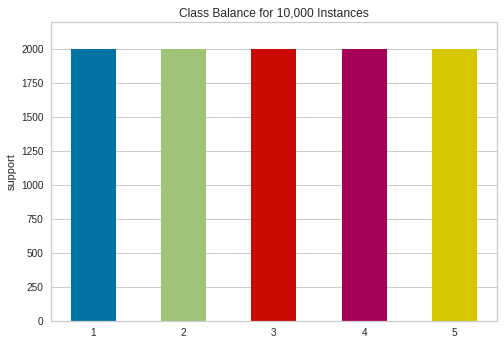

In [ ]:
from yellowbrick.target import class_balance

class_balance(df.RATING)

As shown in the figure above our dataset is totally balanced. This is, there are the same number of examples for each class: 2000

### The five most predominant words for each class.

To obtain the five most predominant words for each class we need to tokenize each sentence and then count every words in order to sum all the occurrences for that rating.

We'll use the BERT tokenizer through the spacy library in order to tokenize the sentences.

Load the model and then use for each example (10k times) could take time due to we should apply the model 10000 times, one per example. In order to increase the speed of the tokenizer operation we could grouped all the sentences by rating and just run the tokenizer once for each class:

In [ ]:
reviews_text_grouped = df.groupby(['RATING'])['TEXT'].sum()
reviews_text_grouped.head()

RATING
1    The shirt was more of a smock. I expected a so...
2    I liked the shirt. it\'s pretty. but I couldn\...
3    I was really excited to see this in mail today...
4    I really like this dress! It\'s so comfortable...
5    This dress is absolutely wonderful. Was afraid...
Name: TEXT, dtype: object

Now we run the model for each class and just count the words which are alphanumeric, digit and not a stop words (stop words are very common in the most of languages):

In [ ]:
from collections import Counter

five_common_words_by_class = []
classes = reviews_text_grouped.axes[0]

# we use only the tokenizer
for doc in nlp.tokenizer.pipe(iter(reviews_text_grouped), batch_size = 1000):
  words = [token.text for token in doc if not token.is_stop and (token.is_alpha or token.is_digit)]
  word_freq = Counter(words)
  five_common_words_by_class.append(word_freq.most_common(5))

Five most predominant words for rating **1**:

In [ ]:
np_arr_1 = np.array(five_common_words_by_class[0])
pd.DataFrame(data=np_arr_1, columns=["word", "times"])

,word,times
0,bra,1257
1,size,604
2,like,451
3,fit,416
4,bras,327


Five most predominant words for rating **2**:

In [ ]:
np_arr_2 = np.array(five_common_words_by_class[1])
pd.DataFrame(data=np_arr_2, columns=["word", "times"])

,word,times
0,bra,1219
1,size,626
2,like,570
3,fit,508
4,bras,387


Five most predominant words for rating **3**:

In [ ]:
np_arr_3 = np.array(five_common_words_by_class[2])
pd.DataFrame(data=np_arr_3, columns=["word", "times"])

,word,times
0,bra,1575
1,size,657
2,like,592
3,comfortable,495
4,fit,484


Five most predominant words for rating **4**:

In [ ]:
np_arr_4 = np.array(five_common_words_by_class[3])
pd.DataFrame(data=np_arr_4, columns=["word", "times"])

,word,times
0,bra,966
1,size,604
2,like,529
3,fit,468
4,comfortable,439


Five most predominant words for rating **5**:

In [ ]:
np_arr_5 = np.array(five_common_words_by_class[4])
pd.DataFrame(data=np_arr_5, columns=["word", "times"])

,word,times
0,bra,521
1,size,478
2,pumping,453
3,love,448
4,wear,447


# Data cleaning

In order to increase the model accuracy and to remove noise which may negatively impact a predictive mode we clean the text by tokenizing it and keep just the most relevant tokens.

This is those tokens which are alphanumeric, digit and they are not an stop word.

However, in this problem we are trying to predict the score of a product given a review which was written by a person. Therefore it makes sense the score is highly related with the *sentiment*.

Nowdays people usually use emojis and emoticons to express sentiment so we should keep then in the text because it will give us a lot of information of the user sentiment.

 To archive that, **we'll extend the spacy tokenizer in order to detect emojis and emoticons**.

Add custom spacy Tokenizer to detect emojis like [ 😻 👍🏿 ] and emoticons like [`:(` `:D` `:P` `>:@`]. Base tokenizer from https://github.com/ines/spacymoji

In [ ]:
# coding: utf8
from __future__ import unicode_literals

import re
from spacy.language import Language
from spacy.tokens import Doc, Span, Token
from spacy.matcher import PhraseMatcher
from emoji import UNICODE_EMOJI

# make sure multi-character emoji don't contain whitespace
EMOJI = {e.replace(' ', ''): t for e, t in UNICODE_EMOJI['en'].items()}

class Emoji:
    """spaCy v2.0 pipeline component for adding emoji meta data to `Doc` objects.
    Detects emoji consisting of one or more unicode characters, and can
    optionally merge multi-char emoji (combined pictures, emoji with skin tone
    modifiers) into one token. Emoji are matched using spaCy's `PhraseMatcher`,
    and looked up in the data table provided by the "emoji" package:
    https://github.com/carpedm20/emoji

    USAGE:
        >>> import spacy
        >>> from spacymoji import Emoji
        >>> nlp = spacy.load('en')
        >>> emoji = Emoji(nlp)
        >>> nlp.add_pipe(emoji, first=True)
        >>> doc = nlp(u"This is a test 😻 👍🏿")
        >>> assert doc._.has_emoji == True
        >>> assert doc[2:5]._.has_emoji == True
        >>> assert doc[0]._.is_emoji == False
        >>> assert doc[4]._.is_emoji == True
        >>> assert doc[5]._.emoji_desc == u'thumbs up dark skin tone'
        >>> assert len(doc._.emoji) == 2
        >>> assert doc._.emoji[1] == (u'👍🏿', 5, u'thumbs up dark skin tone')
    """
    name = 'emoji'

    def __init__(self, nlp, merge_spans=True, lookup={}, pattern_id='EMOJI',
                 attrs=('has_emoji', 'is_emoji', 'emoji_desc', 'emoji'),
                 force_extension=True):
        """Initialise the pipeline component.

        nlp (Language): The shared nlp object. Used to initialise the matcher
            with the shared `Vocab`, and create `Doc` match patterns.
        attrs (tuple): Attributes to set on the ._ property. Defaults to
            ('has_emoji', 'is_emoji', 'emoji_desc', 'emoji').
        pattern_id (unicode): ID of match pattern, defaults to 'EMOJI'. Can be
            changed to avoid ID clashes.
        merge_spans (bool): Merge spans containing multi-character emoji. Will
            only merge combined emoji resulting in one icon, not sequences.
        lookup (dict): Optional lookup table that maps emoji unicode strings
            to custom descriptions, e.g. translations or other annotations.
        RETURNS (callable): A spaCy pipeline component.
        """
        self._has_emoji, self._is_emoji, self._emoji_desc, self._emoji = attrs
        self.merge_spans = merge_spans
        self.lookup = lookup
        self.matcher = PhraseMatcher(nlp.vocab)
        emoji_patterns = list(nlp.tokenizer.pipe(EMOJI.keys()))
        self.matcher.add(pattern_id, None, *emoji_patterns)
        # Add attributes
        Doc.set_extension(self._has_emoji, getter=self.has_emoji, force=force_extension)
        Doc.set_extension(self._emoji, getter=self.iter_emoji, force=force_extension)
        Span.set_extension(self._has_emoji, getter=self.has_emoji, force=force_extension)
        Span.set_extension(self._emoji, getter=self.iter_emoji, force=force_extension)
        Token.set_extension(self._is_emoji, default=False, force=force_extension)
        Token.set_extension(self._emoji_desc, getter=self.get_emoji_desc, force=force_extension)

    def __call__(self, doc):
        """Apply the pipeline component to a `Doc` object.

        doc (Doc): The `Doc` returned by the previous pipeline component.
        RETURNS (Doc): The modified `Doc` object.
        """
        
        # added here regex part to match with emoticons
        old_emojis_regex = r"\>?\:\-?[\(\)\@DPpd\/]"
        for match in re.finditer(old_emojis_regex, doc.text):
          start, end = match.span()
          span = doc.char_span(start, end)
          if span is not None:
            for token in span:
              token._.set(self._is_emoji, True)
        matches = self.matcher(doc)
        spans = []  # keep spans here to merge them later
        for _, start, end in matches:
            span = doc[start : end]
            for token in span:
                token._.set(self._is_emoji, True)
            spans.append(span)
        if self.merge_spans:
            with doc.retokenize() as retokenizer:
                for span in spans:
                    if len(span) > 1:
                        retokenizer.merge(span)
        return doc

    def has_emoji(self, tokens):
        return any(token._.get(self._is_emoji) for token in tokens)

    def iter_emoji(self, tokens):
        return [(t.text, i, t._.get(self._emoji_desc))
                for i, t in enumerate(tokens)
                if t._.get(self._is_emoji)]

    def get_emoji_desc(self, token):
        if token.text in self.lookup:
            return self.lookup[token.text]
        if token.text in EMOJI:
            desc = EMOJI[token.text]
            # Here we're converting shortcodes, e.g. ":man_getting_haircut:"
            return desc.replace('_', ' ').replace(':', '')
        return None

@Language.factory("emoji")
def create_emoji_component(nlp, name):
    return Emoji(nlp)

In [ ]:
nlp.add_pipe('emoji', first=True)

Test our custom tokenizer with a sentence:

In [ ]:
for doc in nlp.pipe(['This is just ☹️ a test :-( for see if 😁 it catches emojis :D'], batch_size = 1000, n_process=4, disable=nlp_default_components):
  [print(token.text) for token in doc if token._.is_emoji]

☹
:-(
😁
:D


Now our dataset is ready to be clean using our custom tokenizer:

In [ ]:
def clean_text(text):
  doc = nlp(text, disable=nlp_default_components)
  return ' '.join([token.text.lower() for token in doc if token.is_alpha or token.is_digit or token._.is_emoji])

In [ ]:
df['CLEAN_TEXT'] = df['TEXT'].apply(lambda x: clean_text(x))
df.head()

,TEXT,RATING,CLEAN_TEXT
0,The shirt was more of a smock. I expected a so...,1,the shirt was more of a smock i expected a sof...
1,The shirt was more of a smock. I expected a so...,1,the shirt was more of a smock i expected a sof...
2,The shirt was more of a smock. I expected a so...,1,the shirt was more of a smock i expected a sof...
3,Just received my order today. When I opened th...,1,just received my order today when i opened the...
4,"First of all, the button hole on this belt nev...",1,first of all the button hole on this belt neve...


# Learning process

As we said previously, our problem is a text classification problem. There are several algorithms we could use to archive that:
- Naive Bayes Classifier
- Support Vector Machine
- Bagging Models
- Words embedding
- Deep Learning

However, since the famouse paper [Attention is all you need](https://arxiv.org/abs/1706.03762) of Vaswani et al, Transformer models have become by far the state of the art in NLP and more specially BERT.

So to face this problem we'll use a fine-tuned BERT model. This is, using transfer learning in order to get pre-trained BERT encoder and easily train it on our dataset.

To archive that we'll use the [huggingface](https://huggingface.co/) libray. This library offers a [search web page](https://huggingface.co/models?filter=en&pipeline_tag=text-classification) where we can seek for a model which fit our problem. After a search, we find the [nlptown/bert-base-multilingual-uncased-sentiment](https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment) model which is, according to its description:


> A bert-base-multilingual-uncased model finetuned for sentiment analysis on product reviews in six languages: English, Dutch, German, French, Spanish and Italian. It predicts the sentiment of the review as a number of stars (between 1 and 5)

In [ ]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from datasets import Dataset, ClassLabel, Features, Value, Sequence, DatasetDict

# https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments

bert_tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
bert_model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment", num_labels=5)

bert_model.cuda()
torch.cuda.empty_cache()

device = torch.cuda.current_device()

### Prepare train and test datasets

Create the column `label` in order to store the encoded target feature. This is, the rating with 0-based index (we apply -1 for each value).

Create the column `sentence` which has the clean text produced by our custom tokenizer in our *Data cleaning* section.



In [ ]:
# the class labels are decremented by 1 (to be in the range [0, 1, 2, 3, 4])
# because PyTorch expects the labels to be zero-indexed
def encode_rating(rating):
  return int(rating) - 1

df['sentence'] = df['CLEAN_TEXT']

# encode RATING as labels
df['label'] = df['RATING'].apply(lambda x: encode_rating(x))
prepared_df = df[['sentence','label']]

features = Features({
    'sentence': Value(dtype='string'),
    'label': ClassLabel(num_classes=5, names=[0,1,2,3,4])
})

Split the dataset in a ratio 80% train and 20% test with balanced data:

In [ ]:
from sklearn.model_selection import train_test_split

train_set_df, test_set_df = train_test_split(prepared_df, train_size=8000, test_size=2000, shuffle=True, stratify=df['label']) # 80%-20%

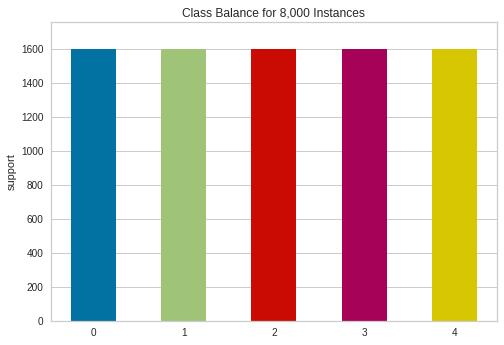

In [ ]:
class_balance(train_set_df.label)

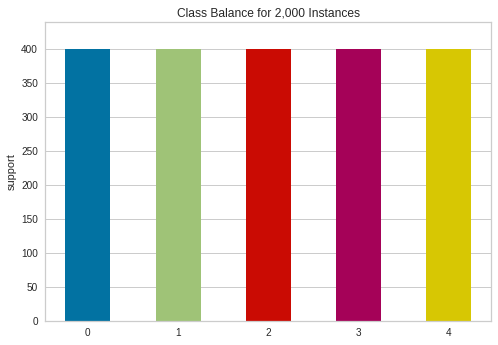

In [ ]:
class_balance(test_set_df.label)

### Training

Train the model using K-Fold cross validation with k = 5

In [ ]:
from sklearn.model_selection import KFold

# preproccess batch using BERT tokenizer
def preprocess_function(batch):
  return bert_tokenizer(batch['sentence'], truncation=True)

# create preprocessed datasets from dataframes
def create_datasets(train_df, validation_df):
  train_dataset = Dataset.from_pandas(train_df, features=features).map(preprocess_function, batched=True)
  validation_dataset = Dataset.from_pandas(validation_df, features=features).map(preprocess_function, batched=True)
  return train_dataset, validation_dataset

# show metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# 5-fold cross-validation
k = 5
kfold = KFold(n_splits=k, shuffle=True)

results = []

for train_idx, validation_idx in kfold.split(train_set_df):
  train_df = train_set_df.iloc[train_idx]
  validation_df = train_set_df.iloc[validation_idx]

  train_dataset, validation_dataset = create_datasets(train_df, validation_df)

  training_args = TrainingArguments(
      evaluation_strategy='epoch',
      learning_rate = 2e-5,
      per_device_train_batch_size=16,
      per_device_eval_batch_size=16,
      num_train_epochs=4,
      weight_decay=0.01,
      load_best_model_at_end=True,
      output_dir='./results',
      logging_dir='./logs'
  )

  trainer = Trainer(
      model=bert_model,
      args=training_args,
      train_dataset=train_dataset,
      eval_dataset=validation_dataset,
      tokenizer=bert_tokenizer,
      compute_metrics=compute_metrics
  )

  trainer.train()

  model_result = trainer.evaluate()
  results.append(model_result['eval_accuracy'])


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Runtime,Samples Per Second
1,No log,0.648881,0.745000,0.739044,0.746925,0.745000,14.682700,108.972000
2,0.829400,0.482958,0.846875,0.847002,0.851051,0.846875,14.811900,108.021000
3,0.361500,0.435061,0.874375,0.874263,0.875890,0.874375,14.851700,107.732000
4,0.165400,0.459224,0.886875,0.886524,0.886797,0.886875,14.862800,107.651000


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Runtime,Samples Per Second
1,No log,0.102008,0.963750,0.963801,0.963999,0.963750,14.845800,107.774000
2,0.272300,0.108581,0.961250,0.961301,0.961527,0.961250,14.861900,107.658000
3,0.138900,0.082734,0.976250,0.976277,0.976396,0.976250,14.851300,107.734000
4,0.059400,0.081819,0.981250,0.981284,0.981424,0.981250,14.926800,107.189000


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Runtime,Samples Per Second
1,No log,0.070704,0.976875,0.976879,0.977174,0.976875,15.446500,103.583000
2,0.161700,0.039394,0.991250,0.991258,0.991288,0.991250,15.393800,103.938000
3,0.091300,0.022081,0.994375,0.994375,0.994409,0.994375,15.342900,104.283000
4,0.031900,0.020844,0.995000,0.995000,0.995020,0.995000,15.342500,104.286000


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Runtime,Samples Per Second
1,No log,0.027036,0.993750,0.993744,0.993815,0.993750,14.577200,109.760000
2,0.118800,0.009041,0.998750,0.998750,0.998752,0.998750,14.558000,109.906000
3,0.056800,0.009149,0.998125,0.998125,0.998127,0.998125,14.525500,110.151000
4,0.022800,0.008065,0.998750,0.998750,0.998754,0.998750,14.495100,110.382000


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Runtime,Samples Per Second
1,No log,0.037510,0.991875,0.991873,0.991904,0.991875,14.932200,107.151000
2,0.097800,0.019611,0.996875,0.996873,0.996877,0.996875,15.038400,106.395000
3,0.037100,0.010728,0.998750,0.998749,0.998754,0.998750,15.008300,106.608000
4,0.011900,0.014973,0.998125,0.998122,0.998131,0.998125,15.022500,106.507000


In [ ]:
results

[0.874375, 0.98125, 0.995, 0.99875, 0.99875]

In [ ]:
print(f"Mean-Precision: {sum(results) / len(results)}")

Mean-Precision: 0.9696250000000001


As we can see we got a nice precision with our model: 96.96%

# Models validation

With the test set prepared, we can apply our fine-tuned model to generate predictions on the test set.

Now we’ll load the holdout dataset and prepare inputs just as we did with the training set. Then we’ll evaluate predictions using [Matthews correlation coefficient (MCC)](https://en.wikipedia.org/wiki/Matthews_correlation_coefficient) because this is the metric used by the wider NLP community to evaluate performance.

With this metric, +1 is the best score, and -1 is the worst score.

### Data preparation

Pre-process our test set like we did with our training set:

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

def preprocess_test_function(batch):
  return bert_tokenizer(batch['sentence'], padding=True, truncation=True)

test_dataset = Dataset.from_pandas(test_set_df, features=features).map(preprocess_test_function, batched=True)
test_tensor_dataset = TensorDataset(torch.tensor(test_dataset['input_ids']), torch.tensor(test_dataset['attention_mask']), torch.tensor(test_dataset['label']))
test_sampler = SequentialSampler(test_tensor_dataset)
test_dataloader = DataLoader(test_tensor_dataset, sampler=test_sampler, batch_size=32)

In [ ]:
from transformers import TextClassificationPipeline

pipeline = TextClassificationPipeline(
            model=bert_model, tokenizer=bert_tokenizer,
            device=torch.cuda.current_device())

bert_model.eval()

predictions , true_labels = [], []

# Predict 
for test_batch in test_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in test_batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = bert_model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
  
  logits = outputs[0]
  
  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []

for i in range(len(true_labels)):
  
  # The predictions for this batch are a 2-column ndarray (one column for "0" 
  # and one column for "1"). Pick the label with the highest value and turn this
  # in to a list of 0s and 1s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  
  # Calculate and store the coef for this batch.  
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
  matthews_set.append(matthews)

In [ ]:
matthews_set

In [ ]:
# Combine the predictions for each batch into a single list of 0s and 1s.
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
# Combine the correct labels for each batch into a single list.
flat_true_labels = [item for sublist in true_labels for item in sublist]
# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)
print('MCC: %.3f' % mcc)

MCC: 0.906


 Our Matthews correlation coefficient is 0.906 which is consistent with the mean precision we got in our model (96.96%)

# Final summary

Due to time constraints I have not been able to put much emphasis on the rocess: analysis, cleaning, training and evaluation:


### Data analysis

Given that the exercise did not specify it and I was runing out of time, I assumed that all the reviews are in English.

However, in a real case, if it is an international website then it is very likely that there would be reviews in other languages.

So it would be a nice-to-have detect languages and check how much % each represents.

### Data Cleaning

With more time available I would perform a more thorough cleaning of the dataset. I would check for noise to remove such as: HTML tags, leaked metadata in the text, etc.

### Learning

I would have liked to apply custom fine-tunning on the pre-trained models with some simple neural network structure to study if we improve the accuracy of the resulting model (https://arxiv.org/pdf/1905.05583.pdf).

I tried this in particular but the neural network that already had the pre-trained model did not match with the new one I wanted to add. Due to lack of time I gave up:

In [ ]:
import torch
import torch.nn as nn

# Create the BertClassfier class
class BertClassifier(nn.Module):
    """Bert Model for Classification Tasks.
    """
    def __init__(self):
        """
        @param    classifier: a torch.nn.Module classifier
        """
        super(BertClassifier, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        D_in, H, D_out = 768, 50, 5

        # Instantiate an one-layer feed-forward classifier
        print = nn.Sequential(
            nn.Linear(D_in, H),
            nn.ReLU(),
            #nn.Dropout(0.5),
            nn.Linear(H, D_out)
        )
        
    def forward(self, input_ids, attention_mask=None, token_type_ids=None,
            position_ids=None, labels=None):
        # Feed input to BERT
        outputs = bert_model(input_ids=input_ids,
                            attention_mask=attention_mask,
                            token_type_ids=token_type_ids,
                            position_ids=position_ids,
                            labels=labels
                            )
        
        # Extract the last hidden state of the token `[CLS]` for classification task
        import pdb; pdb.set_trace()
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

In [ ]:
encoded_dataset['train'].set_format(type='torch', columns=['input_ids', 'sentence', 'attention_mask', 'label'])
train_dataloader = torch.utils.data.DataLoader(encoded_dataset['train'], batch_size=32)

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Instantiate Bert Classifier
custom_bert_classifier = BertClassifier()

# Tell PyTorch to run the model on GPU
custom_bert_classifier.to(device)

# Create the optimizer
optimizer = AdamW(custom_bert_classifier.parameters(),
                  lr=5e-5,    # Default learning rate
                  eps=1e-8    # Default epsilon value
                  )

# Total number of training steps
total_steps = len(train_dataloader) * 5 # epochs

# Set up the learning rate scheduler
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=0, # Default value
                                            num_training_steps=total_steps)

In [ ]:
def compute_metrics(pred):
    print(pred)
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

training_args = TrainingArguments(
    evaluation_strategy='epoch',
    learning_rate = 1e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    output_dir='./results',
    logging_dir='./logs'
)

trainer = Trainer(
    #model=bert_model,
    model=custom_bert_classifier,
    args=training_args,
    train_dataset=encoded_dataset['train'],
    eval_dataset=encoded_dataset['validation'],
    tokenizer=bert_tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

> <ipython-input-29-3c4e67c9c0ea>(36)forward()
-> last_hidden_state_cls = outputs[0][:, 0, :]
(Pdb) outpus[0]
*** NameError: name 'outpus' is not defined
(Pdb) print(outputs[0])
tensor(0.9071, device='cuda:0', grad_fn=<NllLossBackward>)
(Pdb) print(outputs[0][:,0,:])
*** IndexError: too many indices for tensor of dimension 0
(Pdb) print(self.classifier)
Sequential(
  (0): Linear(in_features=768, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=5, bias=True)
)
(Pdb) outputs
SequenceClassifierOutput(loss=tensor(0.9071, device='cuda:0', grad_fn=<NllLossBackward>), logits=tensor([[-1.4198, -1.4305, -0.7265,  0.9164,  1.9642],
        [-3.3068, -1.6029,  0.8007,  2.4000,  1.1918],
        [-2.9611, -2.7077, -0.7314,  2.0420,  3.4327],
        [-0.0172,  0.4067,  0.4901, -0.1378, -0.7802],
        [-1.0643,  0.7416,  1.5714,  0.4082, -1.5433],
        [-2.5283, -2.3315, -0.4056,  1.6807,  2.6892],
        [-2.0566, -0.3024,  1.3530,  1.2901, -0.3996],
    

On the other hand, I'd have liked to make the [hyperparameter search](https://arxiv.org/pdf/1502.02127.pdf) in order to increase the performance of the model. I tried but with no success:

In [ ]:
!pip install optuna
!pip install ray[tune]

In [ ]:
def model_init():
    return AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment", num_labels=5)

trainer = Trainer(
    model_init=model_init,
    args=training_args,
    train_dataset=encoded_dataset["train"].shard(index=1, num_shards=10),
    eval_dataset=encoded_dataset['validation'],
    tokenizer=distilbert_tokenizer,
    compute_metrics=compute_metrics
)

RuntimeError: ignored

In [ ]:
best_run = trainer.hyperparameter_search(n_trials=10, direction="maximize")

In [ ]:
for n, v in best_run.hyperparameters.items():
    setattr(trainer.args, n, v)

trainer.train()

### Validation

Finally, I would also have liked to do benchmarking with [The Stanford Sentiment Treebank (SST-5, or SST-fine-grained)](https://nlp.stanford.edu/sentiment/code.html) dataset on the model.